<a href="https://colab.research.google.com/github/OjashShakya/Ojash_Shakya_2408654_AI_Workshops/blob/main/2408654_OjashShakya_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ojash Shakya

ID: 2408654

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

 # 1. Exploratory Data Analysis and Data Understanding

## Choosing a Dataset:

Loading Dataset

In [ ]:
# Kaggle Link: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/data
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/Coursework/courseworkDatasets/carbonEmissionDataset.csv");

Displaying Basic Information of Dataset

In [ ]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
print(df.shape)

(7385, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Conducting Exploratory Data Analysis (EDA):

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

Unique Values

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Make': ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
Unique values in column 'Model': ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
Unique values in column 'Vehicle Class': ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
Unique values in column 'Transmission': ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A

In [ ]:
df.duplicated().sum()

1103

In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


### Data Cleaning and Preprocessing:


Checking for Duplicate Values

In [ ]:
df.drop_duplicates(inplace=True);
df.duplicated().sum()

0

Checking for Missing Values

In [ ]:
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


Statistical Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


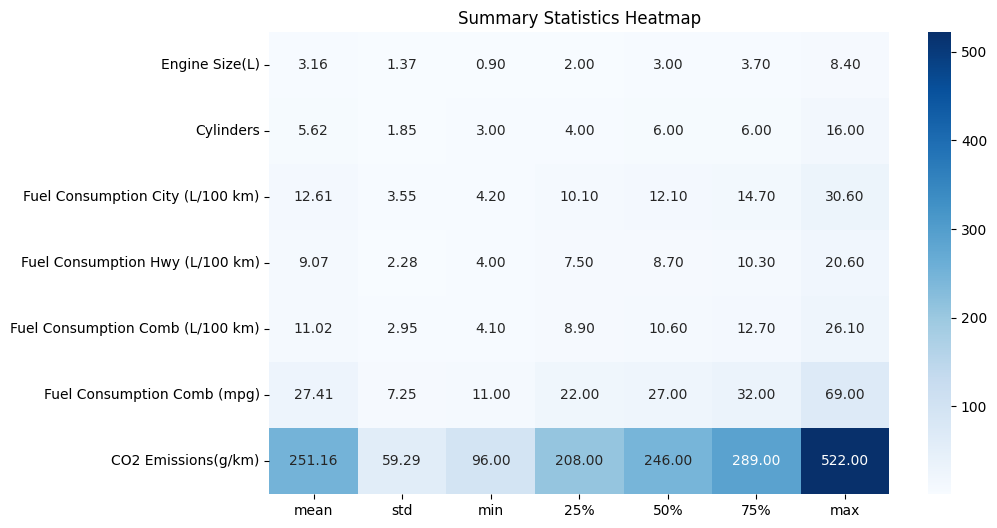

In [ ]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

In [ ]:
df.describe(include= 'object').T

,count,unique,top,freq
Make,6282,42,FORD,577
Model,6282,2053,F-150 FFV,32
Vehicle Class,6282,16,SUV - SMALL,1006
Transmission,6282,27,AS6,1139
Fuel Type,6282,5,X,3039


Renaming the column for better readability

In [ ]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [ ]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

Feature and Target Selection

In [ ]:
X = df.drop('co2', axis=1)
print("Features (X):\n", X.head())
y = df['co2']
print("\nTarget (y):\n", y.head())

Features (X):
     make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4          AS5   
1  ACURA         ILX       COMPACT          2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT          1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6          AS6   

  fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  fuel_cons_comb_mpg  
0         Z             9.9            6.7             8.5                  33  
1         Z            11.2            7.7             9.6                  29  
2         Z             6.0            5.8             5.9                  48  
3         Z            12.7            9.1            11.1                  25  
4         Z            12.1            8.7            10.6                  27  

Target (y):
 0    196
1    221
2    136
3    25

### Data Visualization and Charts

#### Categorical Features

In [ ]:
top_models = df.model.value_counts()[:20]
top_models

,count
model,
F-150 FFV,32
F-150 FFV 4X4,31
MUSTANG,27
FOCUS FFV,24
F-150 4X4,20
F-150,19
SONIC 5,18
ATS,18
JETTA,18


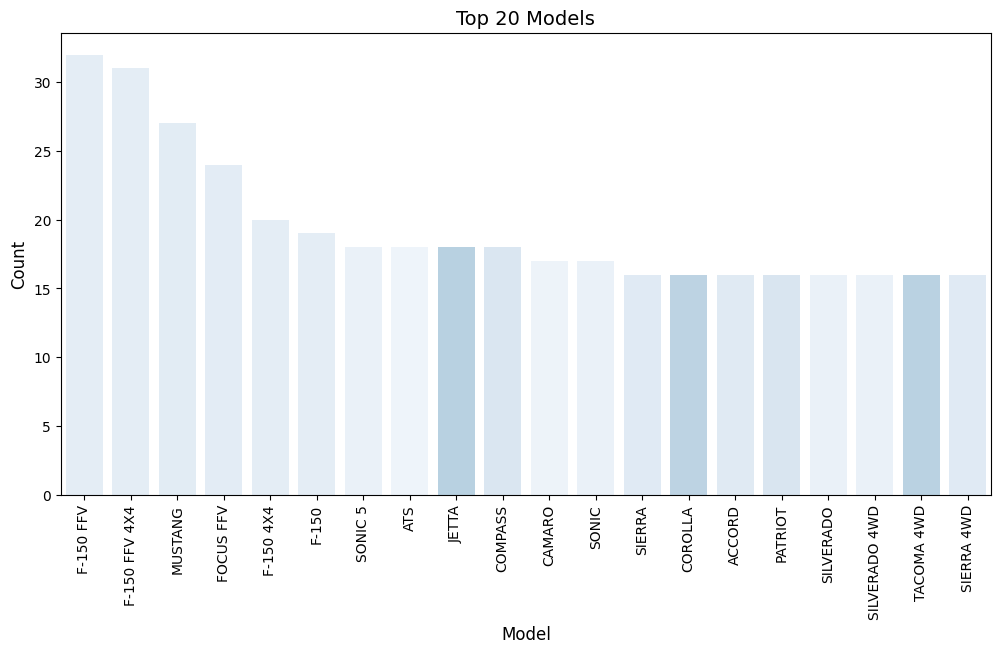

In [ ]:
plt.figure(figsize=(12,6))

a = sns.countplot( x="model", data=df, order=top_models.index, hue="model", palette="Blues")
plt.xticks(rotation=90)
plt.title("Top 20 Models", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.bar_label(a.containers[0])
plt.show()

In [ ]:
df.vehicle_class.value_counts()

,count
vehicle_class,
SUV - SMALL,1006
MID-SIZE,983
COMPACT,903
SUV - STANDARD,613
SUBCOMPACT,533
FULL-SIZE,508
PICKUP TRUCK - STANDARD,475
TWO-SEATER,381
MINICOMPACT,274


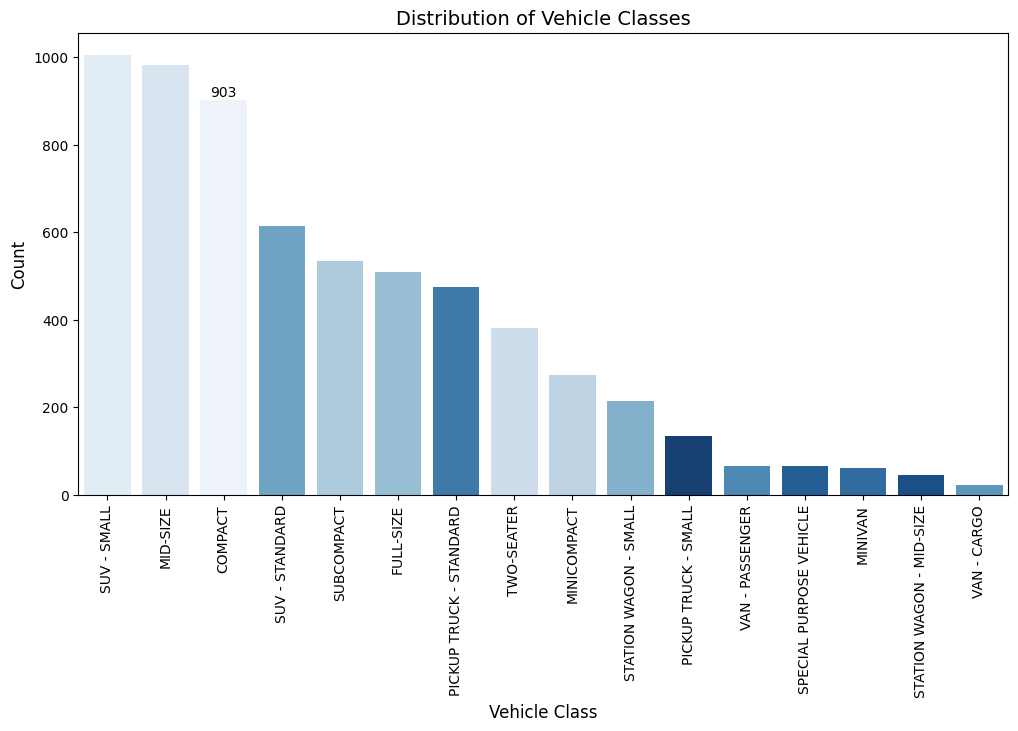

In [ ]:
plt.figure(figsize=(12, 6))

a = sns.countplot(data=df, x="vehicle_class", order=df.vehicle_class.value_counts().index, hue="vehicle_class", palette="Blues")
plt.xticks(rotation=90)
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Vehicle Classes", fontsize=14)
plt.bar_label(a.containers[0])
plt.show()

#### Numerical Features

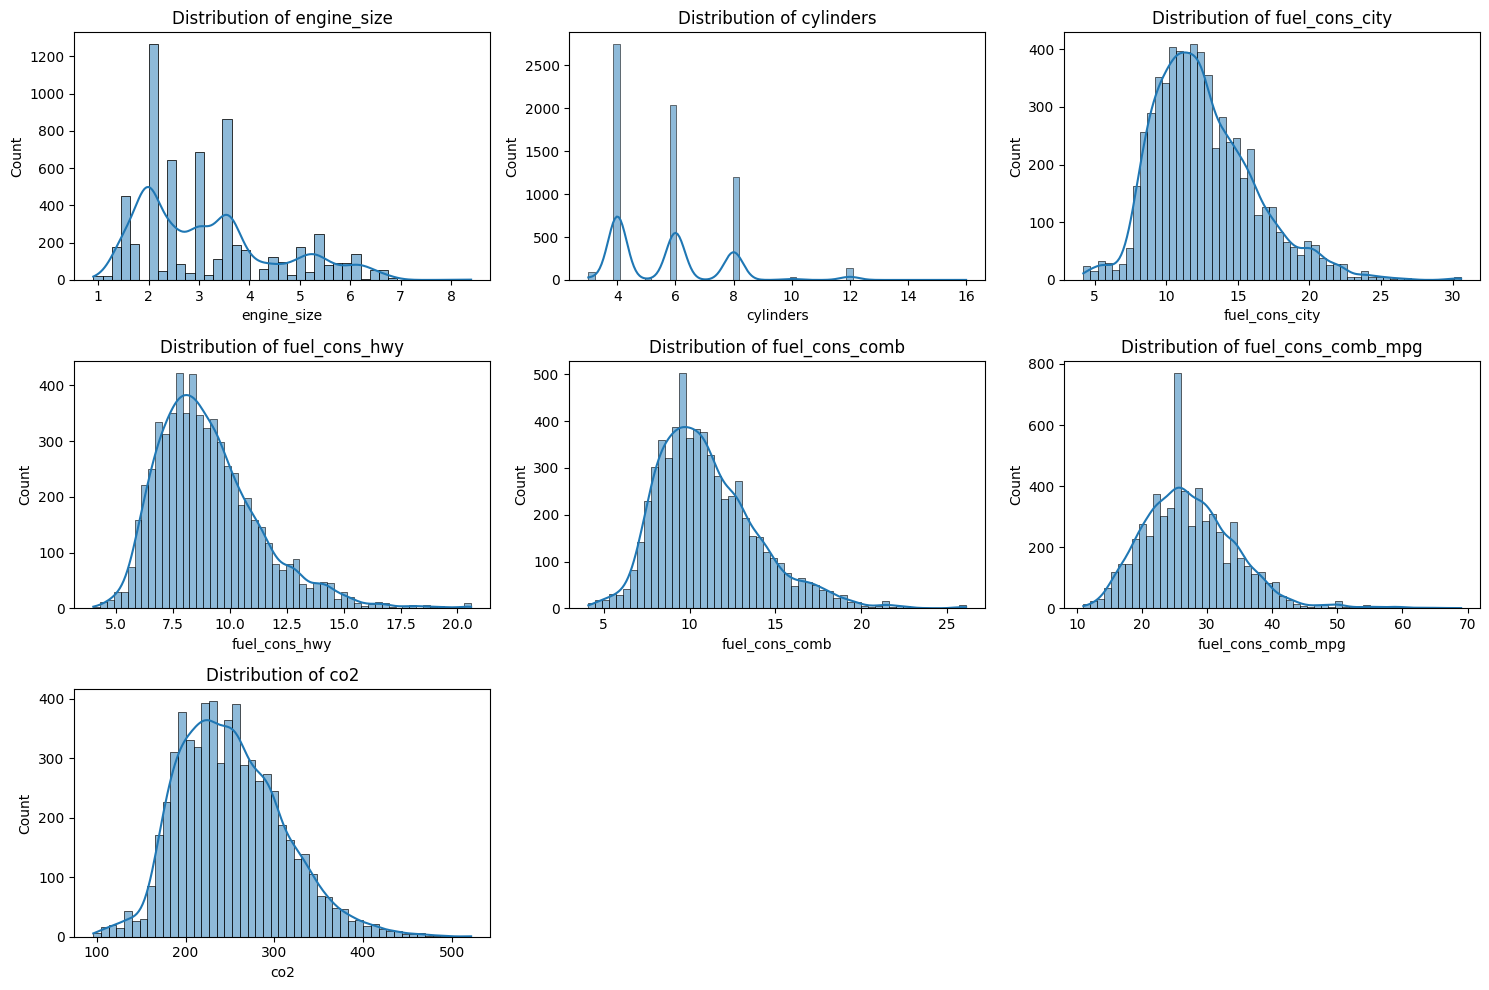

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
num_vars = len(numerical_df.columns)
for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

Checking Outliers

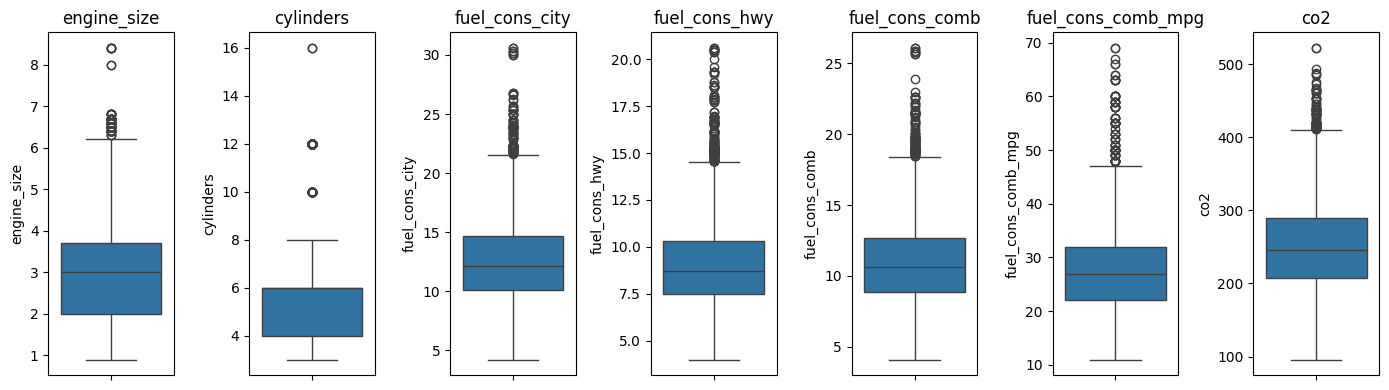

In [ ]:
x = 0
plt.figure(figsize=(16, 4))
for col in df.select_dtypes(include=['number']).columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Target carbon emission distribution

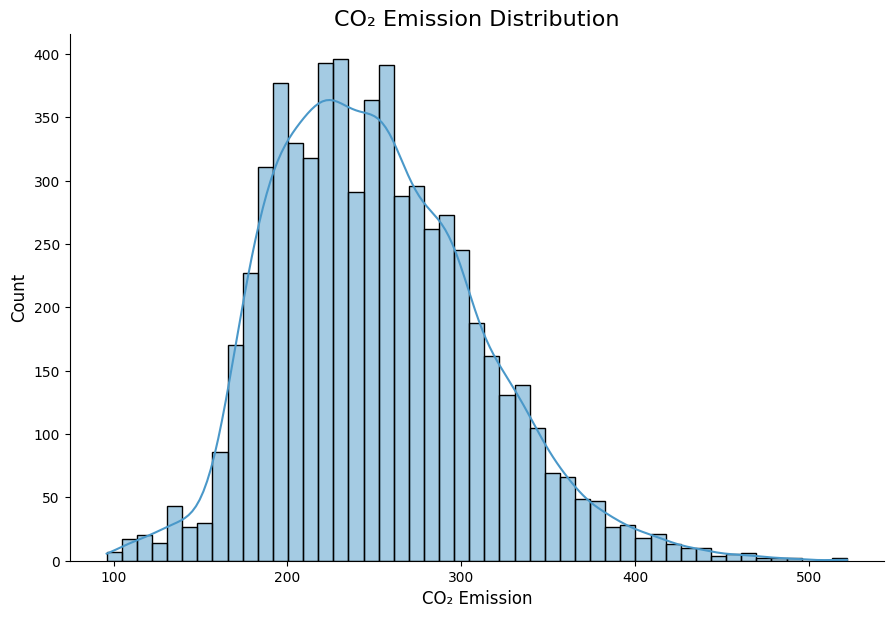

In [ ]:
blue_palette = sns.color_palette("Blues", as_cmap=True)
sns.displot(df.co2, kde=True, color=blue_palette(0.6), aspect=1.5, height=6)
plt.title("CO₂ Emission Distribution", fontsize=16,)
plt.xlabel("CO₂ Emission", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

Correlation matrix for numerical features

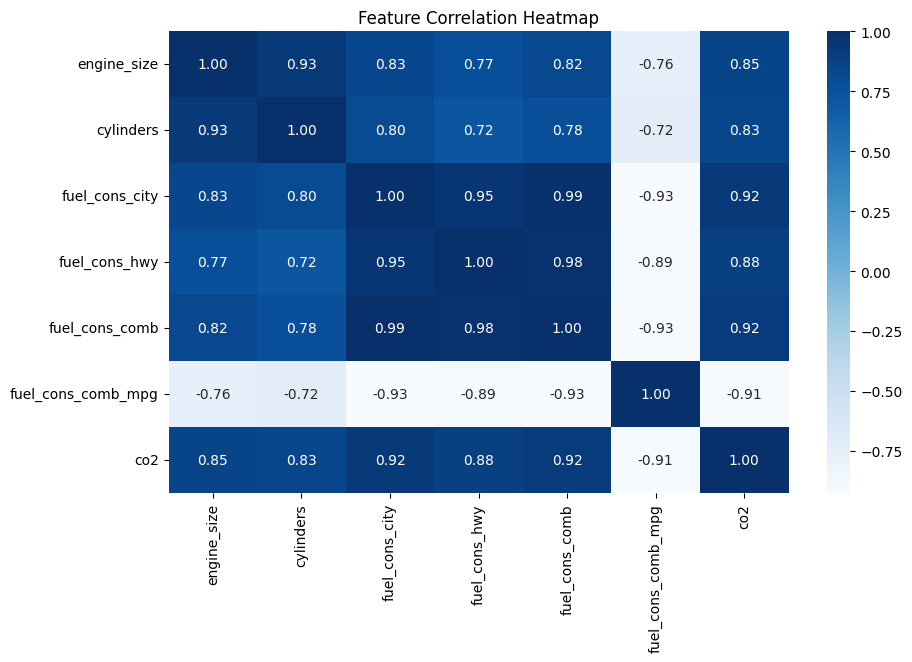

In [ ]:
plt.figure(figsize=(10, 6))

numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#  2. Building a Model from Scratch

Dropping non-informative columns

In [ ]:
df = df.drop(columns=["make", "model"])

Choosing an appropriate target column

In [ ]:
target_column = 'co2'

Identifying categorical and numerical columns

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_features)
numerical_features = [col for col in df.columns if col not in categorical_features + [target_column]]
print("Numerical Features:", numerical_features)

Categorical Features: Index(['vehicle_class', 'transmission', 'fuel_type'], dtype='object')
Numerical Features: ['vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2']


Updated categorical and numerical columns

In [ ]:
categorical_features = ["vehicle_class", "transmission", "fuel_type"]
numerical_features = [col for col in df.columns if col not in categorical_features + [target_column]]

Applying One-Hot Encoding and Scaling


In [ ]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X = preprocessor.fit_transform(df.drop(columns=[target_column]))
Y = df[target_column].values.reshape(-1, 1)

Scaling or standardizating the features

In [ ]:
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

Train-test split (80%-20%)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

print("X Train features shape:", X_train.shape)
print("y Train target shape:", Y_train.shape)
print("X Test features shape:", X_test.shape)
print("y Test target shape:", Y_test.shape)

X Train features shape: (5025, 54)
y Train target shape: (5025, 1)
X Test features shape: (1257, 54)
y Test target shape: (1257, 1)


Initialize weights randomly

In [ ]:
np.random.seed(42)
W = np.random.randn(X_train.shape[1], 1) * 0.01
alpha = 0.01
iterations = 1000

Linear Regression Model from Scratch

In [ ]:
def cost_function(X, Y, W, lambda_reg=0.1):  # Add regularization parameter
      m = len(Y)
      Y_pred = X @ W
      cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2) + (lambda_reg / (2 * m)) * np.sum(W**2) # L2 regularization
      return cost

def gradient_descent(X, Y, W, alpha, iterations):
    m = Y.shape[0]
    cost_history = []

    for i in range(iterations):
        Y_pred = X @ W # prediction

        loss = Y_pred - Y
        gradient = (1 / m) * (X.T @ loss) # gradient


        W -= alpha * gradient # weight

        cost = cost_function(X, Y, W)
        cost_history.append(cost)

    return W, cost_history


Train model using gradient descent

In [ ]:
W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

Predicting on test set

In [ ]:
Y_pred = X_test @ W_optimal
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

def r2(Y, Y_pred):
    ss_total = np.sum((Y - np.mean(Y)) ** 2)
    ss_residual = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

Calculate performance metrics

In [ ]:
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

print("Cost History (First 10 iterations):", cost_history[:10])
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

Cost History (First 10 iterations): [30538.20317850102, 28092.4477052483, 25844.705515621725, 23778.785534761424, 21879.838721640685, 20134.244673093428, 18529.508065279948, 17054.164049325726, 15697.691800562583, 14450.435495381449]
RMSE on Test Set: 5.9734329783908775
R-Squared on Test Set: 0.9901123156177699


Predicted vs Acutal Scatterplot

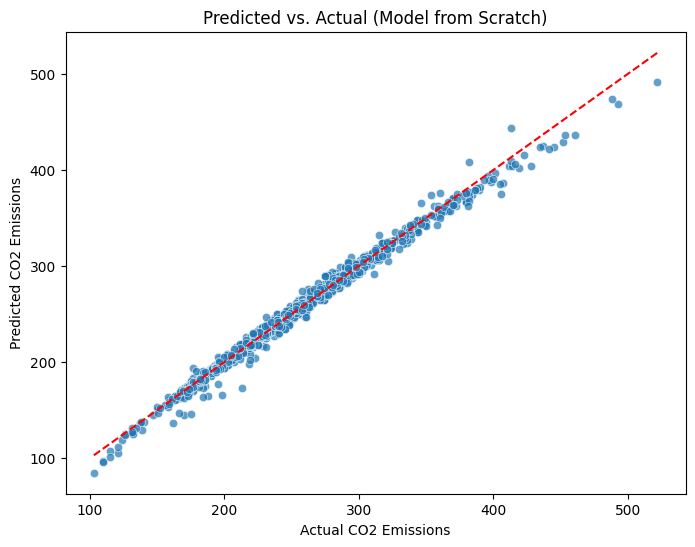

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.ravel(), y=Y_pred.ravel(), alpha=0.7) # Flatten Y_test and Y_pred for plotting
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", linestyle="--")  # Add a diagonal line (y=x)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Predicted vs. Actual (Model from Scratch)")
plt.show()

# 3. Build a Primary Model

## Models:

### Using Lasso Regression Model

Train-test split (80%-20%)

In [ ]:
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(exclude=["object"]).columns.tolist()
numerical_features.remove("co2")

X = df.drop(columns=["co2"])
y = df["co2"]

# Apply One-Hot Encoding to categorical variables
preprocessor = ColumnTransformer([
    ("num", "passthrough", numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
])

X_transformed = preprocessor.fit_transform(X)
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
# Display Train Test Shapes
print("X Train features shape:", X_train.shape)
print("y Train target shape:", y_train.shape)
print("X Test features shape:", X_test.shape)
print("y Test target shape:", y_test.shape)

X Train features shape: (5025, 54)
y Train target shape: (5025,)
X Test features shape: (1257, 54)
y Test target shape: (1257,)


Initialize and train the model using Lasso Regression

In [ ]:
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)

y_pred = model_lasso.predict(X_test)
y_train_pred = model_lasso.predict(X_train)

# Model Performance Metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
print("\nModel Performance - Lasso Regression")
print(f"RMSE (Train): {rmse_train:.3f}")
print(f"RMSE (Test): {rmse_test:.3f}")
print(f"R² Score (Train): {r2_train:.3f}")
print(f"R² Score (Test): {r2_test:.3f}")

# Overall Model Performance
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
y_combined_pred = model_lasso.predict(X_combined)

overall_rmse = np.sqrt(mean_squared_error(y_combined, y_combined_pred))
overall_r2 = r2_score(y_combined, y_combined_pred)
print("\nOverall Model Performance - Lasso Regression:")
print(f"Overall RMSE: {overall_rmse:.5f}")
print(f"Overall R² Score: {overall_r2:.5f}")


Model Performance - Lasso Regression
RMSE (Train): 9.296
RMSE (Test): 9.931
R² Score (Train): 0.975
R² Score (Test): 0.973

Overall Model Performance - Lasso Regression:
Overall RMSE: 9.42624
Overall R² Score: 0.97472


## Random Forest Regression Model

Train-test split (80%-20%)

In [ ]:
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(exclude=["object"]).columns.tolist()

numerical_features.remove("co2")
X = df.drop(columns=["co2"])
y = df["co2"]

# Apply One-Hot Encoding to categorical variables
preprocessor = ColumnTransformer([
    ("num", "passthrough", numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
])

X_transformed = preprocessor.fit_transform(X)
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
# Display Train Test Shapes
print("X Train features shape:", X_train.shape)
print("y Train target shape:", y_train.shape)
print("X Test features shape:", X_test.shape)
print("y Test target shape:", y_test.shape)

X Train features shape: (5025, 54)
y Train target shape: (5025,)
X Test features shape: (1257, 54)
y Test target shape: (1257,)


Initialize and train the model using Random Forest Regression

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

# Model Performance Metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
print("\nModel Performance - Random Forest:")
print(f"RMSE (Train): {rmse_train:.3f}")
print(f"RMSE (Test): {rmse_test:.3f}")
print(f"R² Score (Train): {r2_train:.3f}")
print(f"R² Score (Test): {r2_test:.3f}")

# Overall Model Performance
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
y_combined_pred = model_rf.predict(X_combined)

overall_rmse = np.sqrt(mean_squared_error(y_combined, y_combined_pred))
overall_r2 = r2_score(y_combined, y_combined_pred)
print("\nOverall Model Performance - Random Forest:")
print(f"Overall RMSE: {overall_rmse:.5f}")
print(f"Overall R² Score: {overall_r2:.5f}")


Model Performance - Random Forest:
RMSE (Train): 1.435
RMSE (Test): 3.729
R² Score (Train): 0.999
R² Score (Test): 0.996

Overall Model Performance - Random Forest:
Overall RMSE: 2.10442
Overall R² Score: 0.99874


## Model Comparison:

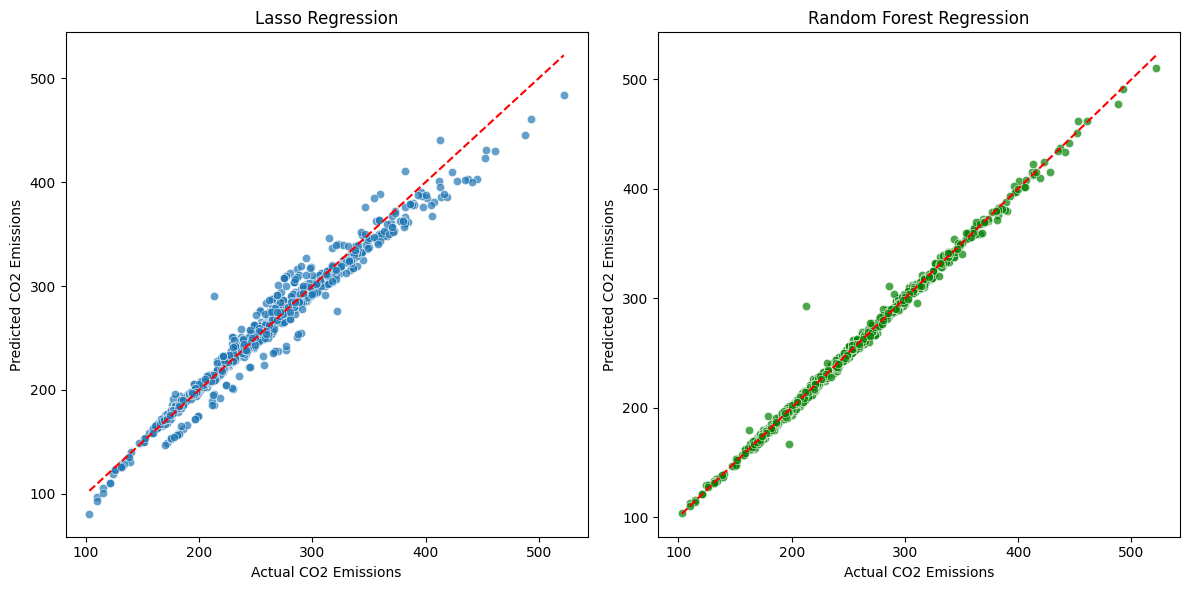

In [ ]:
# Predictions for Lasso and Random Forest
y_pred_lasso = model_lasso.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Lasso Regression
sns.scatterplot(x=y_test, y=y_pred_lasso, ax=axes[0], alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
axes[0].set_xlabel("Actual CO2 Emissions")
axes[0].set_ylabel("Predicted CO2 Emissions")
axes[0].set_title("Lasso Regression")
# Random Forest Regression
sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[1], alpha=0.7, color="green")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
axes[1].set_xlabel("Actual CO2 Emissions")
axes[1].set_ylabel("Predicted CO2 Emissions")
axes[1].set_title("Random Forest Regression")

plt.tight_layout()
plt.show()

# 4. Hyper-parameter Optimization

### For Lasso Regression

In [ ]:
param_dist_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'selection': ['cyclic', 'random'],
    'max_iter': [1000, 5000, 10000]
}

random_search_lasso = RandomizedSearchCV(
    estimator=Lasso(),
    param_distributions=param_dist_lasso,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search_lasso.fit(X_train, y_train)
best_params_lasso = random_search_lasso.best_params_
best_model_lasso = random_search_lasso.best_estimator_
print("Best Hyperparameters for Lasso:", best_params_lasso)

Best Hyperparameters for Lasso: {'selection': 'cyclic', 'max_iter': 5000, 'alpha': 0.01}


### For Random Forest Regression

In [ ]:
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 30, 'bootstrap': False}


# 5. Feature Selection

### For Lasso Regression

In [ ]:
# Best model from RandomizedSearchCV
best_model_lasso = random_search_lasso.best_estimator_
onehot_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
all_features = numerical_features + onehot_columns

selected_features_lasso = np.where(best_model_lasso.coef_ != 0)[0]
selected_feature_names_lasso = [all_features[i] for i in selected_features_lasso]
print("Selected Features (Lasso):", selected_feature_names_lasso)

Selected Features (Lasso): ['engine_size', 'cylinders', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'fuel_cons_comb_mpg', 'vehicle_class_COMPACT', 'vehicle_class_FULL-SIZE', 'vehicle_class_MINICOMPACT', 'vehicle_class_PICKUP TRUCK - SMALL', 'vehicle_class_PICKUP TRUCK - STANDARD', 'vehicle_class_SPECIAL PURPOSE VEHICLE', 'vehicle_class_STATION WAGON - SMALL', 'vehicle_class_SUBCOMPACT', 'vehicle_class_SUV - STANDARD', 'vehicle_class_TWO-SEATER', 'vehicle_class_VAN - CARGO', 'vehicle_class_VAN - PASSENGER', 'transmission_A4', 'transmission_A6', 'transmission_A7', 'transmission_A8', 'transmission_A9', 'transmission_AM6', 'transmission_AM7', 'transmission_AS10', 'transmission_AS6', 'transmission_AS7', 'transmission_AS8', 'transmission_AV', 'transmission_AV6', 'transmission_M6', 'fuel_type_D', 'fuel_type_E', 'fuel_type_X', 'fuel_type_Z']


### For Random Forest Regression

In [ ]:
# Best model from RandomizedSearchCV
best_model_rf = random_search_rf.best_estimator_
importances = best_model_rf.feature_importances_
onehot_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
all_features = numerical_features + onehot_columns

feature_importances_df = pd.DataFrame({'feature': all_features, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False).head(10)
print("Top 10 Feature Importances (Random Forest):\n", feature_importances_df)

Top 10 Feature Importances (Random Forest):
                feature  importance
4       fuel_cons_comb    0.464137
5   fuel_cons_comb_mpg    0.255222
2       fuel_cons_city    0.122469
3        fuel_cons_hwy    0.064107
50         fuel_type_E    0.037249
0          engine_size    0.030072
1            cylinders    0.014621
49         fuel_type_D    0.004224
53         fuel_type_Z    0.001811
52         fuel_type_X    0.001599


# 6. Final Model

### For Lasso Regression

In [ ]:
y_pred_lasso = best_model_lasso.predict(X_test)
# Evaluation Metrics
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"RMSE: {rmse_lasso:.3f}")
print(f"R² Score: {r2_lasso:.3f}")


Lasso Regression:
RMSE: 5.787
R² Score: 0.991


### For Random Forest Regression

In [ ]:
y_pred_rf = best_model_rf.predict(X_test)
# Evaluation Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression:")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R² Score: {r2_rf:.3f}")


Random Forest Regression:
RMSE: 3.881
R² Score: 0.996


## Final Model Comparison

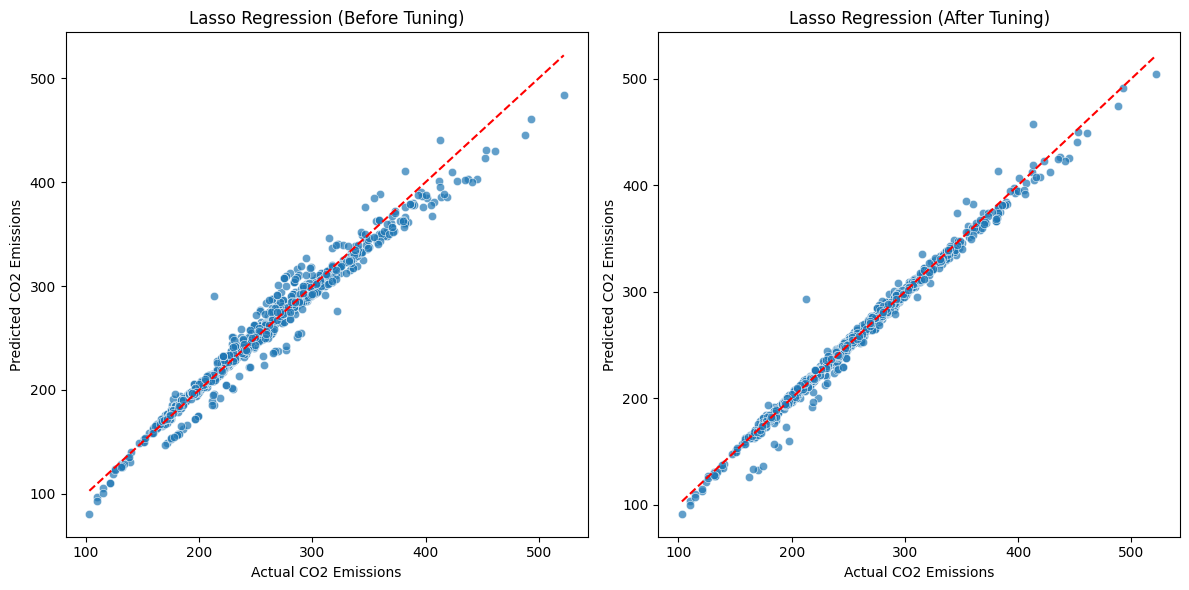

In [ ]:
y_pred_lasso_before = model_lasso.predict(X_test)
y_pred_lasso_after = best_model_lasso.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Lasso Regression - Before Tuning
sns.scatterplot(x=y_test, y=y_pred_lasso_before, ax=axes[0], alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
axes[0].set_xlabel("Actual CO2 Emissions")
axes[0].set_ylabel("Predicted CO2 Emissions")
axes[0].set_title("Lasso Regression (Before Tuning)")

# Lasso Regression - After Tuning
sns.scatterplot(x=y_test, y=y_pred_lasso_after, ax=axes[1], alpha=0.7)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
axes[1].set_xlabel("Actual CO2 Emissions")
axes[1].set_ylabel("Predicted CO2 Emissions")
axes[1].set_title("Lasso Regression (After Tuning)")

# Improve layout
plt.tight_layout()
plt.show()
